<a href="https://colab.research.google.com/github/baonghi9991-tech/data-analyst-portfolio/blob/main/pythonproject_nghi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart W

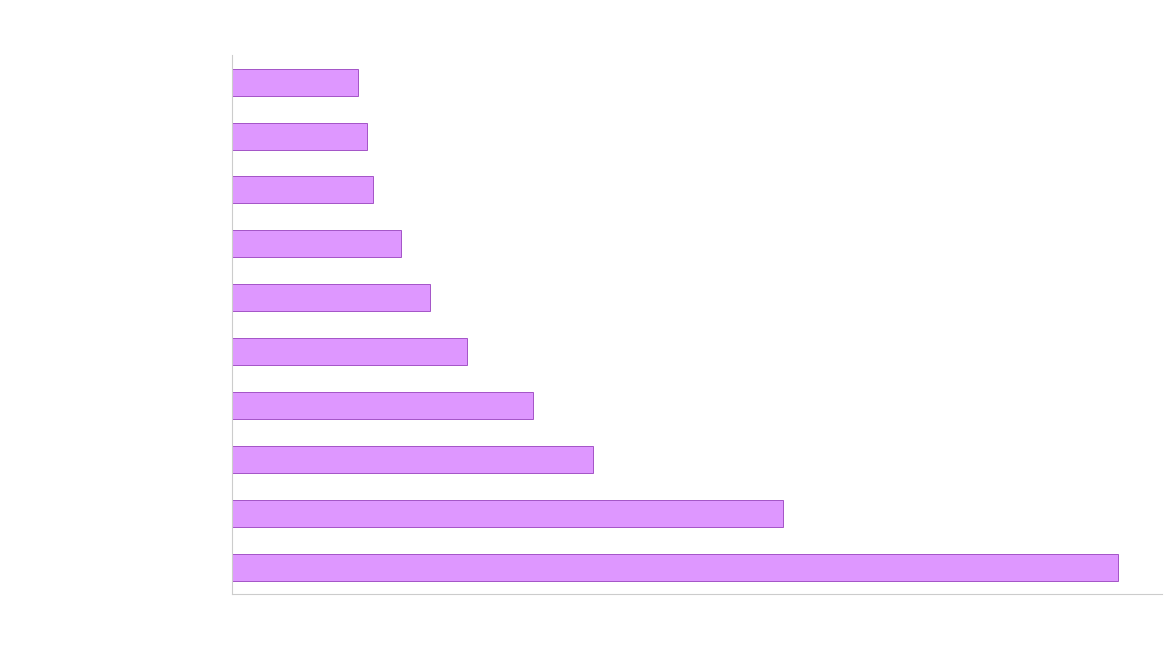

In [ ]:
import matplotlib.pyplot as plt

# Top nhà phát hành theo doanh thu toàn cầu
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Tạo figure với nền trong suốt
plt.figure(figsize=(12, 7), facecolor='none')  # Nền figure trong suốt
ax = top_publishers.plot(kind='barh',
                         color='#de97ff',
                         edgecolor='#a455c8',
                         linewidth=0.7)

# Thiết lập style
plt.title('Top 10 Nhà Phát Hành Game Theo Doanh Thu',
          pad=20, fontsize=15, color='#333333')
plt.xlabel('Doanh Số Toàn Cầu (triệu USD)', fontsize=12)
plt.ylabel('')
ax.set_facecolor('none')  # Nền axes trong suốt

# Ẩn viền không cần thiết
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

plt.title('Top 10 Nhà Phát Hành Game Theo Doanh Thu',
          pad=20, fontsize=15, color='white')  # Tiêu đề trắng
plt.xlabel('Doanh Số Toàn Cầu (triệu USD)', fontsize=12, color='white')
plt.ylabel('')
ax.tick_params(axis='both', colors='white')  # Chữ trục trắng

# Lưu file với nền trong suốt
plt.savefig('top_publishers.png',
            transparent=True,  # Quan trọng: tạo nền trong suốt
            dpi=300,
            bbox_inches='tight')

plt.show()

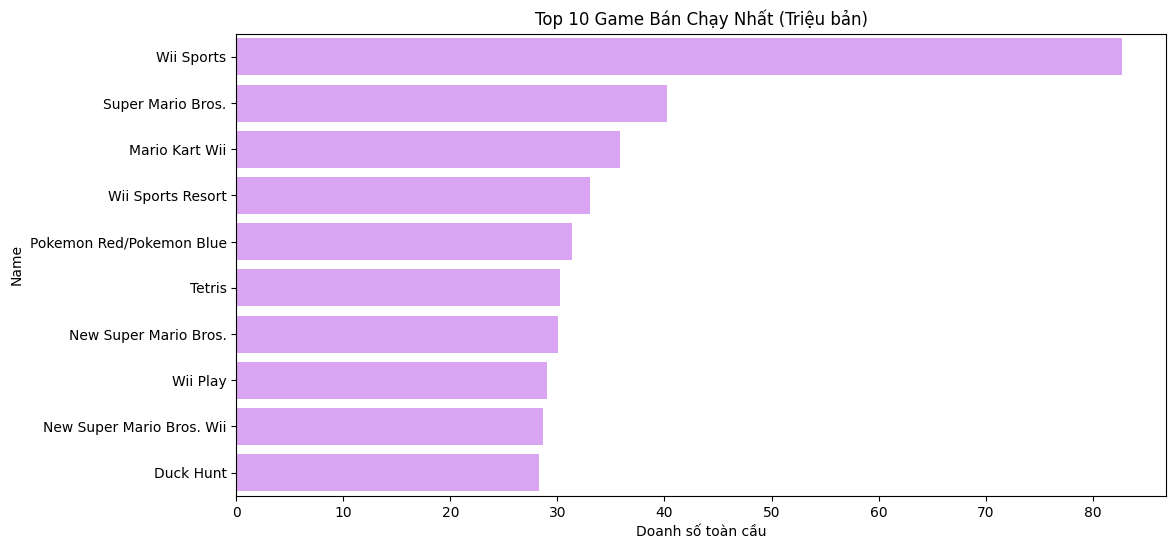

In [ ]:
#Top 10 Game Bán Chạy Nhất
top10 = df.sort_values('Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Global_Sales', y='Name', data=top10, color='#de97ff')
plt.title('Top 10 Game Bán Chạy Nhất (Triệu bản)')
plt.xlabel('Doanh số toàn cầu')
plt.show()

In [ ]:
# Sắp xếp theo doanh số toàn cầu và lấy top 10
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Chọn các cột cần hiển thị
top_10_table = top_10_games[['Name', 'Publisher', 'Genre', 'Global_Sales']]

# Đổi tên cột để dễ đọc (nếu cần xuất báo cáo)
top_10_table.columns = ['Tên Game', 'Nhà Phát Hành', 'Thể Loại', 'Doanh Số Toàn Cầu (triệu)']

# Hiển thị bảng
print(top_10_table.to_string(index=False))

                 Tên Game Nhà Phát Hành     Thể Loại  Doanh Số Toàn Cầu (triệu)
               Wii Sports      Nintendo       Sports                      82.74
        Super Mario Bros.      Nintendo     Platform                      40.24
           Mario Kart Wii      Nintendo       Racing                      35.82
        Wii Sports Resort      Nintendo       Sports                      33.00
 Pokemon Red/Pokemon Blue      Nintendo Role-Playing                      31.37
                   Tetris      Nintendo       Puzzle                      30.26
    New Super Mario Bros.      Nintendo     Platform                      30.01
                 Wii Play      Nintendo         Misc                      29.02
New Super Mario Bros. Wii      Nintendo     Platform                      28.62
                Duck Hunt      Nintendo      Shooter                      28.31


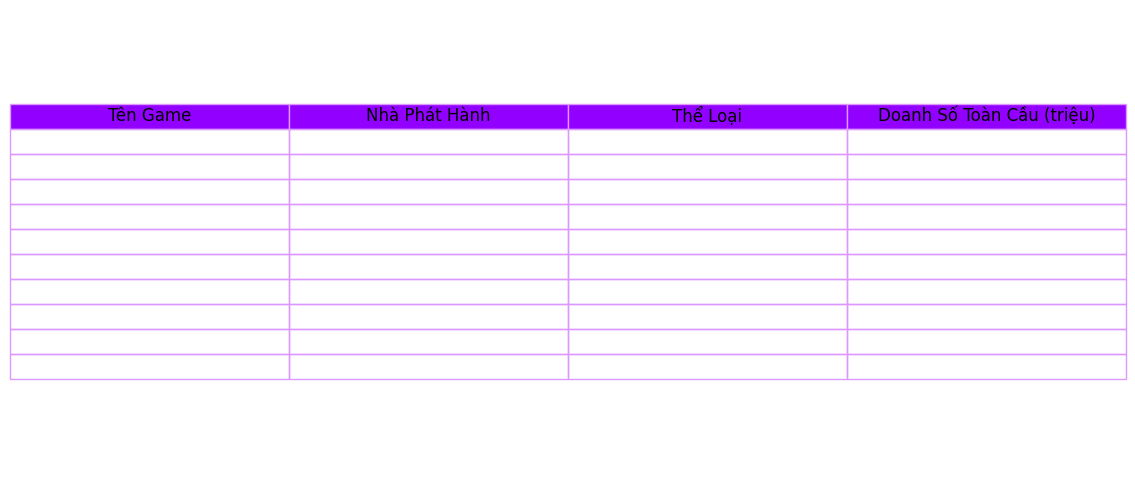

In [ ]:
import matplotlib.pyplot as plt

# Lấy dữ liệu top 10
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
top_10_table = top_10_games[['Name', 'Publisher', 'Genre', 'Global_Sales']]
top_10_table.columns = ['Tên Game', 'Nhà Phát Hành', 'Thể Loại', 'Doanh Số Toàn Cầu (triệu)']

# Tạo figure với nền trong suốt
fig = plt.figure(figsize=(12, 6), facecolor='none')  # <-- THÊM DÒNG NÀY
ax = fig.add_subplot(111, frame_on=False)  # <-- THÊM AXIS KHÔNG VIỀN
ax.axis('off')

# Tạo bảng
table = ax.table(
    cellText=top_10_table.values,
    colLabels=top_10_table.columns,
    cellLoc='center',
    loc='center',
    colColours=['#de97ff']*4  # Màu hồng cho header
)

# Thiết lập style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Đặt thuộc tính cho các ô
for key, cell in table._cells.items():
    if key[0] == 0:  # Ô tiêu đề
        cell.get_text().set_color('black')
        cell.set_facecolor('#9200ff')  # Nền hồng
    else:  # Ô nội dung
        cell.get_text().set_color('white')
        cell.set_facecolor('none')  # Nền trong suốt

    cell.set_edgecolor('#de97ff')  # Viền đen
    cell.set_linewidth(1)

# Lưu file với nền trong suốt
plt.savefig('top10_table.png',
            transparent=True,  # <-- QUAN TRỌNG
            dpi=300,
            bbox_inches='tight')

plt.show()

<Axes: title={'center': 'Xếp hạng doanh thu theo nền tảng'}, xlabel='Platform'>

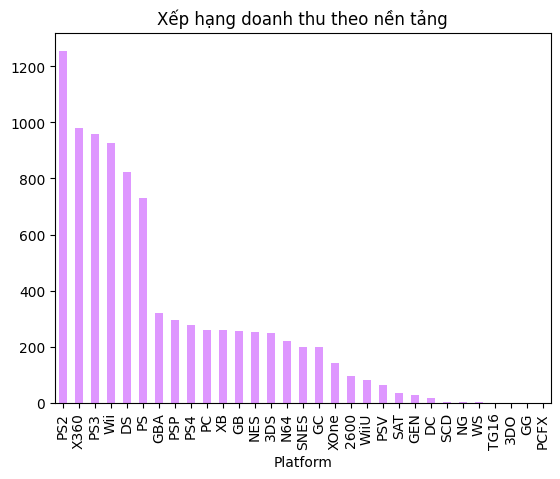

In [ ]:
#top nền tảng
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', title='Xếp hạng doanh thu theo nền tảng', color='#de97ff')

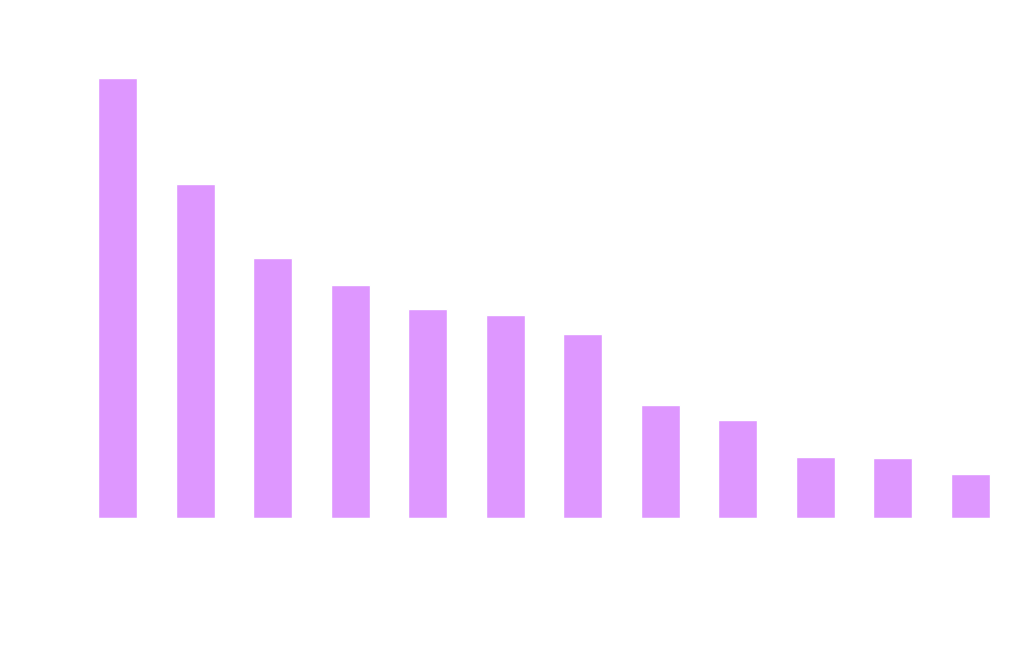

In [ ]:
import matplotlib.pyplot as plt

# Tính doanh thu theo thể loại
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Tạo figure với nền trong suốt
plt.figure(figsize=(12, 6), facecolor='none')
ax = genre_sales.plot(kind='bar', color='#de97ff', edgecolor='white')

# Thiết lập chữ trắng
ax.set_title('Doanh thu toàn cầu theo thể loại game',
             fontsize=15, color='white', pad=20)
ax.set_xlabel('Thể loại game', fontsize=12, color='white')
ax.set_ylabel('Doanh số (triệu USD)', fontsize=12, color='white')
ax.tick_params(axis='both', colors='white')  # Chữ trục trắng

# Thiết lập nền trong suốt
ax.set_facecolor('none')  # Nền biểu đồ trong suốt

# Tùy chỉnh viền
for spine in ax.spines.values():
    spine.set_edgecolor('white')  # Viền trắng

# Lưu file với nền trong suốt
plt.savefig('doanh_thu_the_loai.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight')

plt.show()

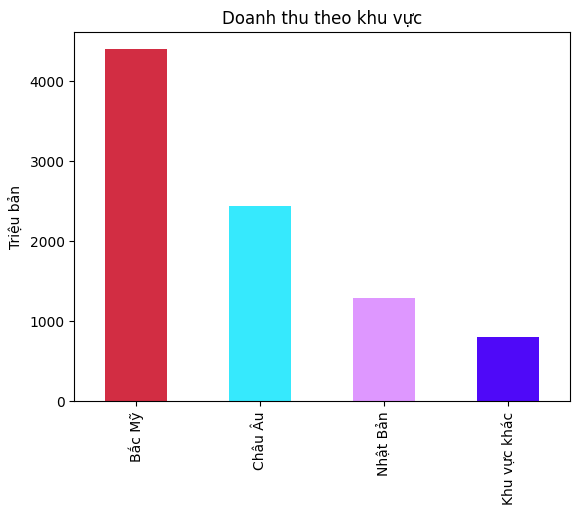

In [ ]:
#Doanh Số Theo Khu Vực
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.rename({'NA_Sales': 'Bắc Mỹ', 'EU_Sales': 'Châu Âu', 'JP_Sales': 'Nhật Bản', 'Other_Sales': 'Khu vực khác'})
region_sales.plot(kind='bar', color=['#d22d43', '#36e9fd', '#de97ff', '#4f09f8'])
plt.title('Doanh thu theo khu vực')
plt.ylabel('Triệu bản')
plt.show()

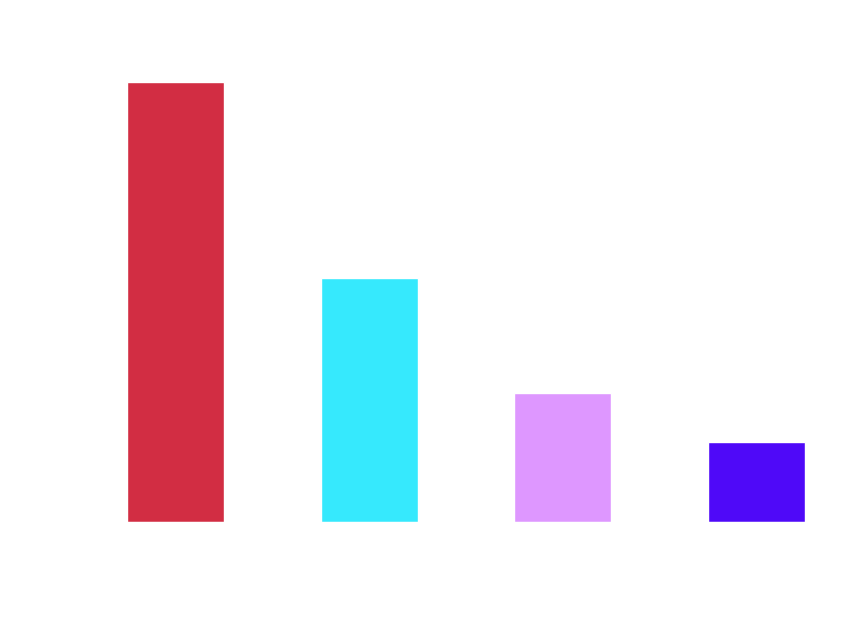

In [ ]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.rename({
    'NA_Sales': 'Bắc Mỹ',
    'EU_Sales': 'Châu Âu',
    'JP_Sales': 'Nhật Bản',
    'Other_Sales': 'Khu vực khác'
})

# Tạo figure với nền trong suốt
plt.figure(figsize=(10, 6), facecolor='none')
ax = region_sales.plot(
    kind='bar',
    color=['#d22d43', '#36e9fd', '#de97ff', '#4f09f8'],
    edgecolor='white',
    linewidth=1
)

# Thiết lập toàn bộ chữ màu trắng
plt.title('DOANH SỐ THEO KHU VỰC',
          fontsize=15, color='white', pad=20)
plt.ylabel('Triệu bản', fontsize=12, color='white')
ax.tick_params(axis='both', colors='white')  # Chữ trục trắng

# Thiết lập nền trong suốt
ax.set_facecolor('none')

# Tùy chỉnh viền biểu đồ
for spine in ax.spines.values():
    spine.set_color('white')  # Viền trắng

# Thêm giá trị trên mỗi cột
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            f'{p.get_height():.1f}M',
            ha='center',
            va='bottom',
            color='white',
            fontsize=11)

# Lưu file với nền trong suốt
plt.savefig('doanh_so_khu_vuc.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight')

plt.show()

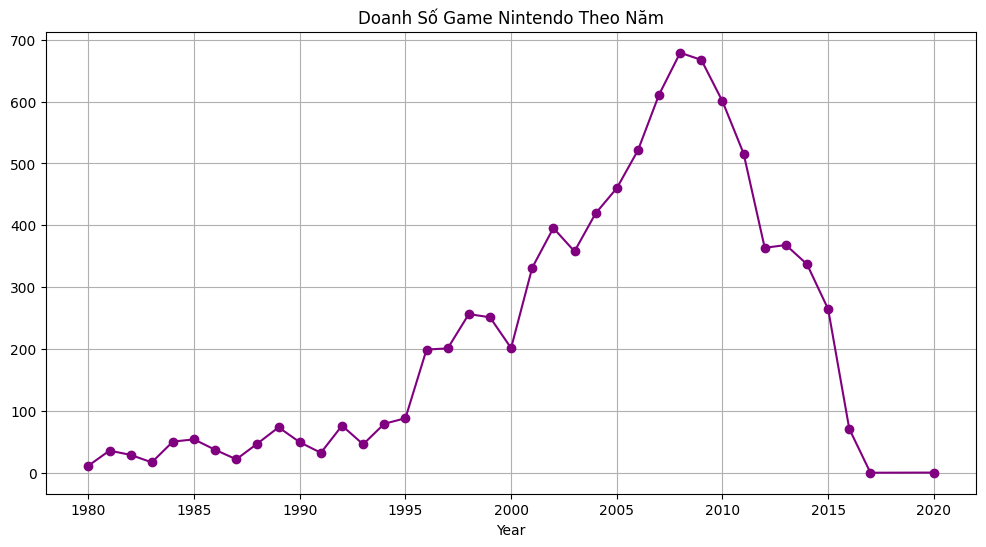

In [ ]:
#Doanh số theo năm
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12,6))
yearly_sales.plot(marker='o', color='purple')
plt.title('Doanh Số Game Nintendo Theo Năm')
plt.grid()
plt.show()

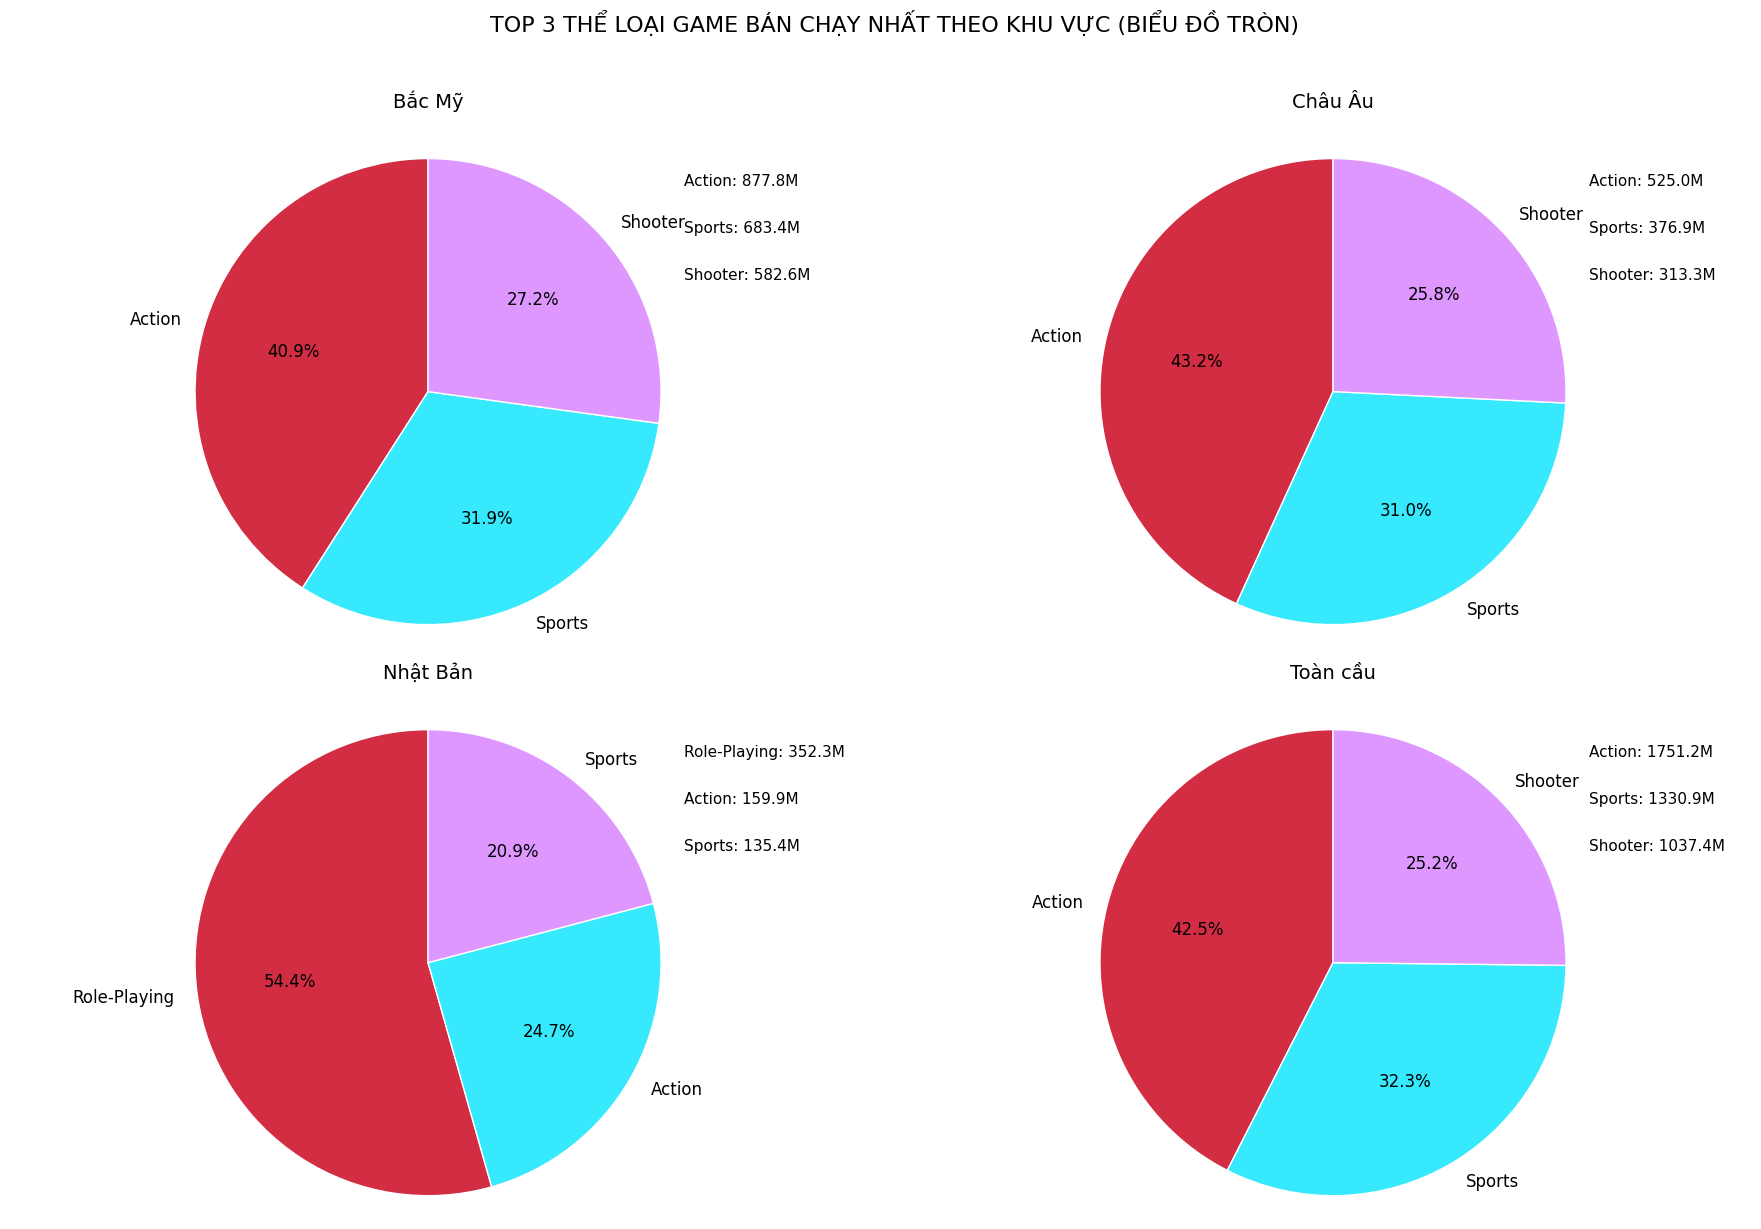

In [ ]:
# Thiết lập style
# plt.style.use('seaborn') # Removing this line
colors = ['#d22d43', '#36e9fd', '#de97ff', '#4f09f8']

# Tạo figure lớn
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('TOP 3 THỂ LOẠI GAME BÁN CHẠY NHẤT THEO KHU VỰC (BIỂU ĐỒ TRÒN)',
             fontsize=16, y=1.02)

# Dictionary các khu vực
regions = {
    'Bắc Mỹ': 'NA_Sales',
    'Châu Âu': 'EU_Sales',
    'Nhật Bản': 'JP_Sales',
    'Toàn cầu': 'Global_Sales'
}

# Vẽ biểu đồ cho từng khu vực
for i, (region_name, region_col) in enumerate(regions.items()):
    ax = axes[i//2, i%2]

    # Tính toán top 3
    genre_sales = df.groupby('Genre')[region_col].sum().nlargest(3)

    # Vẽ pie chart
    wedges, texts, autotexts = ax.pie(
        genre_sales,
        labels=genre_sales.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 12}
    )

    # Thêm số liệu tuyệt đối
    for j, (label, value) in enumerate(zip(genre_sales.index, genre_sales)):
        ax.text(1.1, 0.9 - j*0.2,
                f'{label}: {value:.1f}M',
                va='center', fontsize=11)

    # Thiết lập tiêu đề
    ax.set_title(region_name, fontsize=14, pad=20)

    # Đảm bảo hình tròn
    ax.axis('equal')

plt.tight_layout()
plt.show()

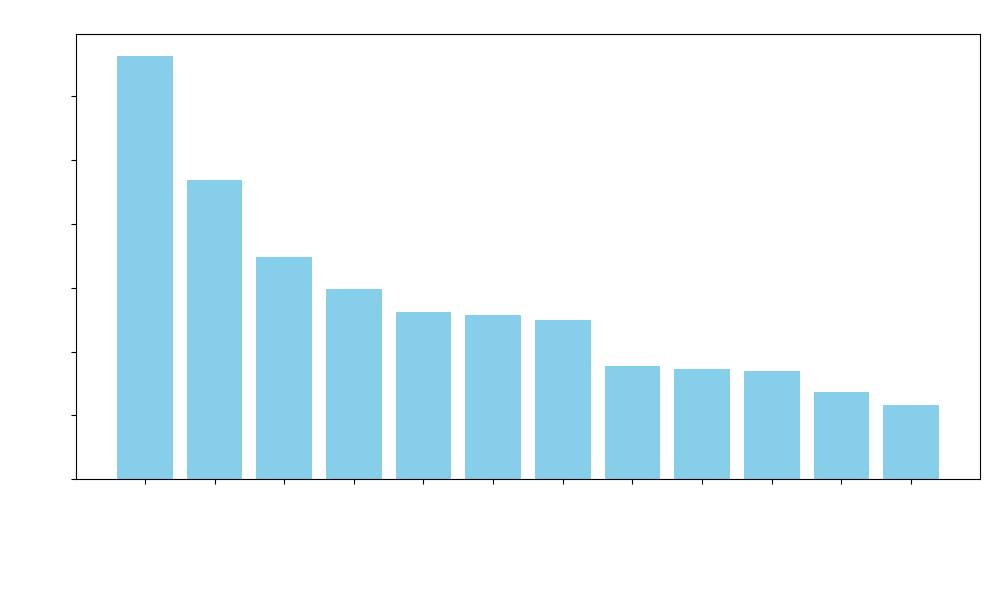

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame tên là df chứa các cột như 'Genre'
# Nếu đọc từ file CSV, bạn có thể dùng: df = pd.read_csv('ten_file.csv')

# Đếm số lượng game theo thể loại
genre_counts = df['Genre'].value_counts()

# Tạo biểu đồ
plt.figure(figsize=(10, 6), facecolor='none')  # Nền ngoài trong suốt
bars = plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

# Tuỳ chỉnh giao diện
plt.title('Số lượng game theo thể loại', color='white')
plt.xlabel('Thể Loại', color='white')
plt.ylabel('Số Lượng', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('none')  # Nền trong suốt cho plot

# Hiển thị số lượng trên đỉnh cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval),
             ha='center', va='bottom', color='white', fontsize=9)

# Hiển thị và lưu biểu đồ
plt.tight_layout()
plt.savefig('genre_bar_chart.png', transparent=True)
plt.show()

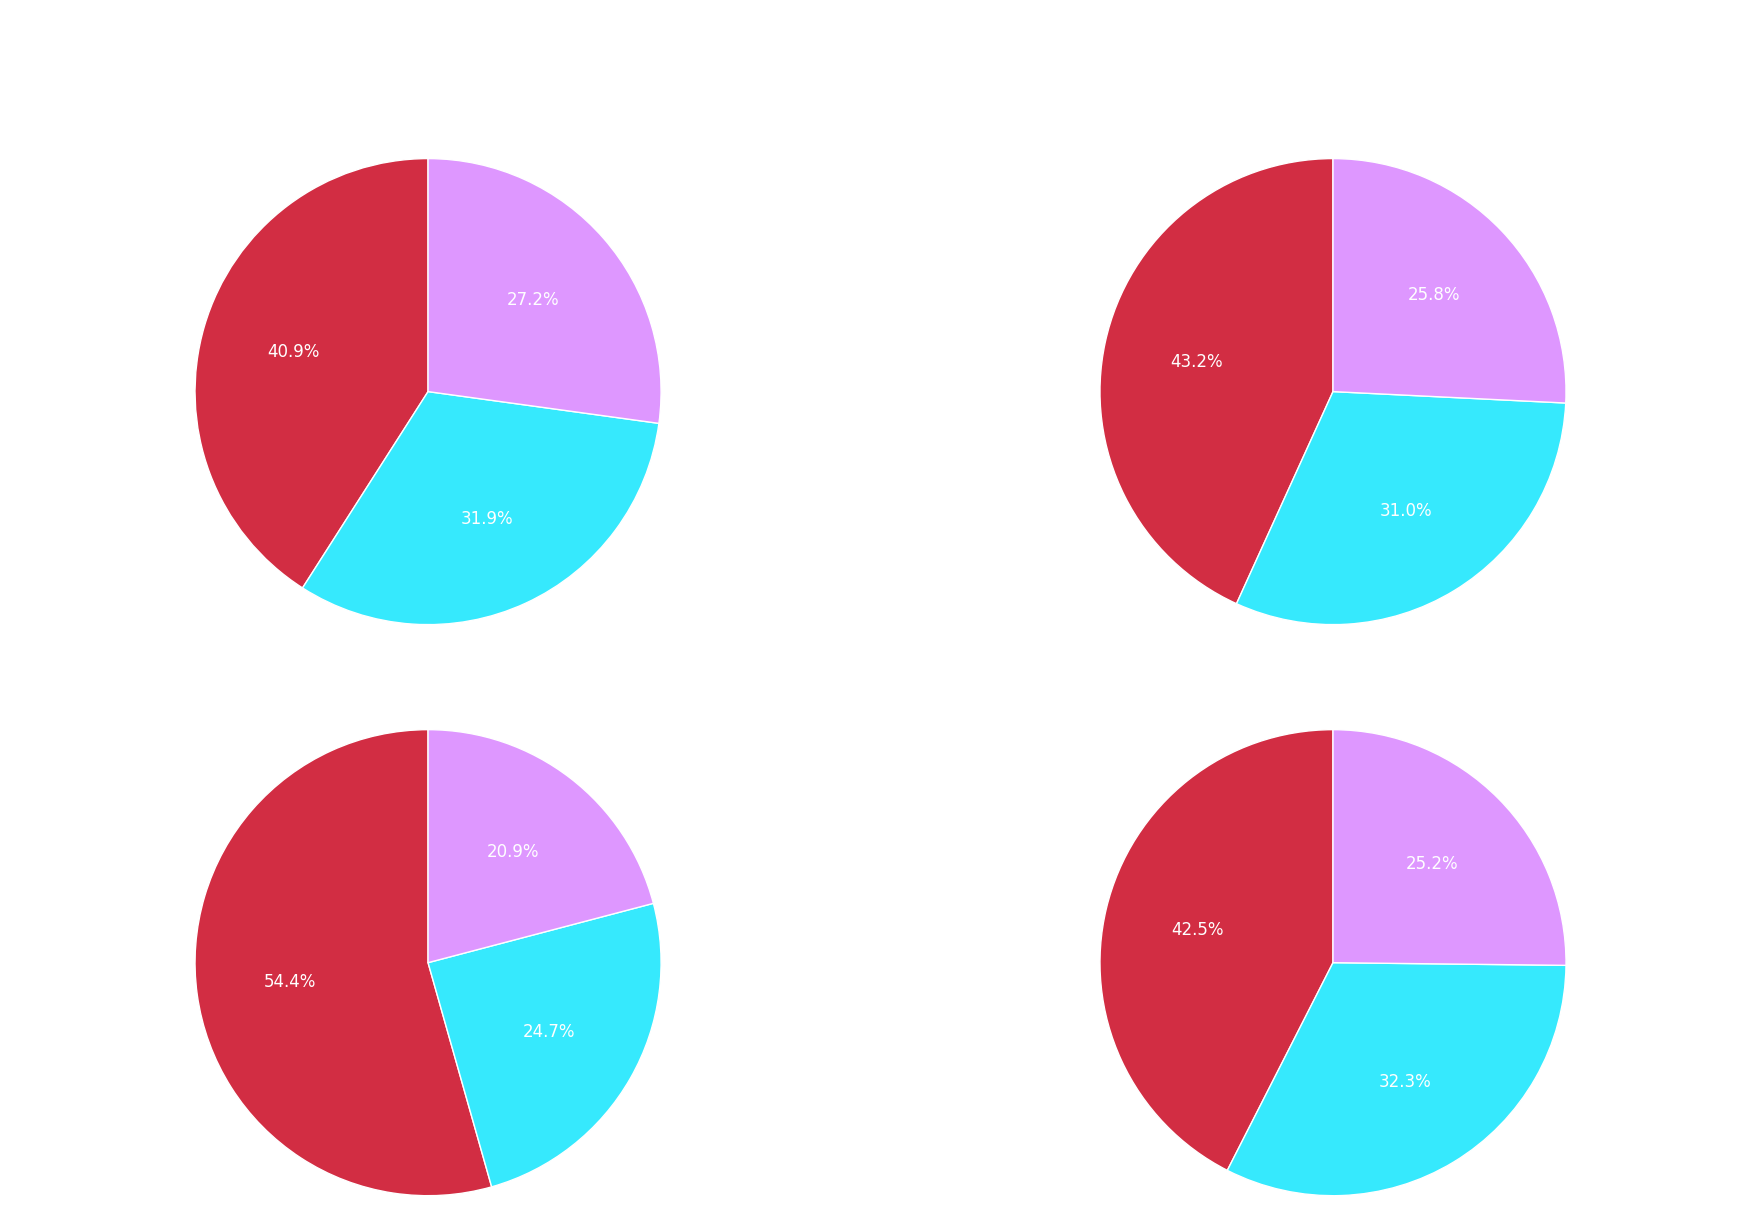

In [ ]:
import matplotlib.pyplot as plt

# Thiết lập màu sắc
colors = ['#d22d43', '#36e9fd', '#de97ff', '#4f09f8']

# Tạo figure với nền trong suốt
fig = plt.figure(figsize=(18, 12), facecolor='none')  # Nền trong suốt
fig.suptitle('TOP 3 THỂ LOẠI GAME BÁN CHẠY NHẤT THEO KHU VỰC',
            fontsize=16, y=1.02, color='white')  # Chữ trắng

# Dictionary các khu vực
regions = {
    'Bắc Mỹ': 'NA_Sales',
    'Châu Âu': 'EU_Sales',
    'Nhật Bản': 'JP_Sales',
    'Toàn cầu': 'Global_Sales'
}

# Vẽ biểu đồ cho từng khu vực
for i, (region_name, region_col) in enumerate(regions.items()):
    ax = fig.add_subplot(2, 2, i+1, facecolor='none')  # Nền trong suốt

    # Tính toán top 3
    genre_sales = df.groupby('Genre')[region_col].sum().nlargest(3)

    # Vẽ pie chart với chữ trắng
    wedges, texts, autotexts = ax.pie(
        genre_sales,
        labels=genre_sales.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'color': 'white', 'fontsize': 12}  # Chữ trắng
    )

    # Thêm số liệu tuyệt đối (chữ trắng)
    for j, (label, value) in enumerate(zip(genre_sales.index, genre_sales)):
        ax.text(1.1, 0.9 - j*0.2,
                f'{label}: {value:.1f}M',
                va='center',
                fontsize=11,
                color='white')

    # Thiết lập tiêu đề (chữ trắng)
    ax.set_title(region_name, fontsize=14, pad=20, color='white')
    ax.axis('equal')

    # Tùy chỉnh viền
    for spine in ax.spines.values():
        spine.set_color('white')  # Viền trắng

plt.tight_layout()

# Lưu file với nền trong suốt
plt.savefig('top3_the_loai_khu_vuc.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight')

plt.show()

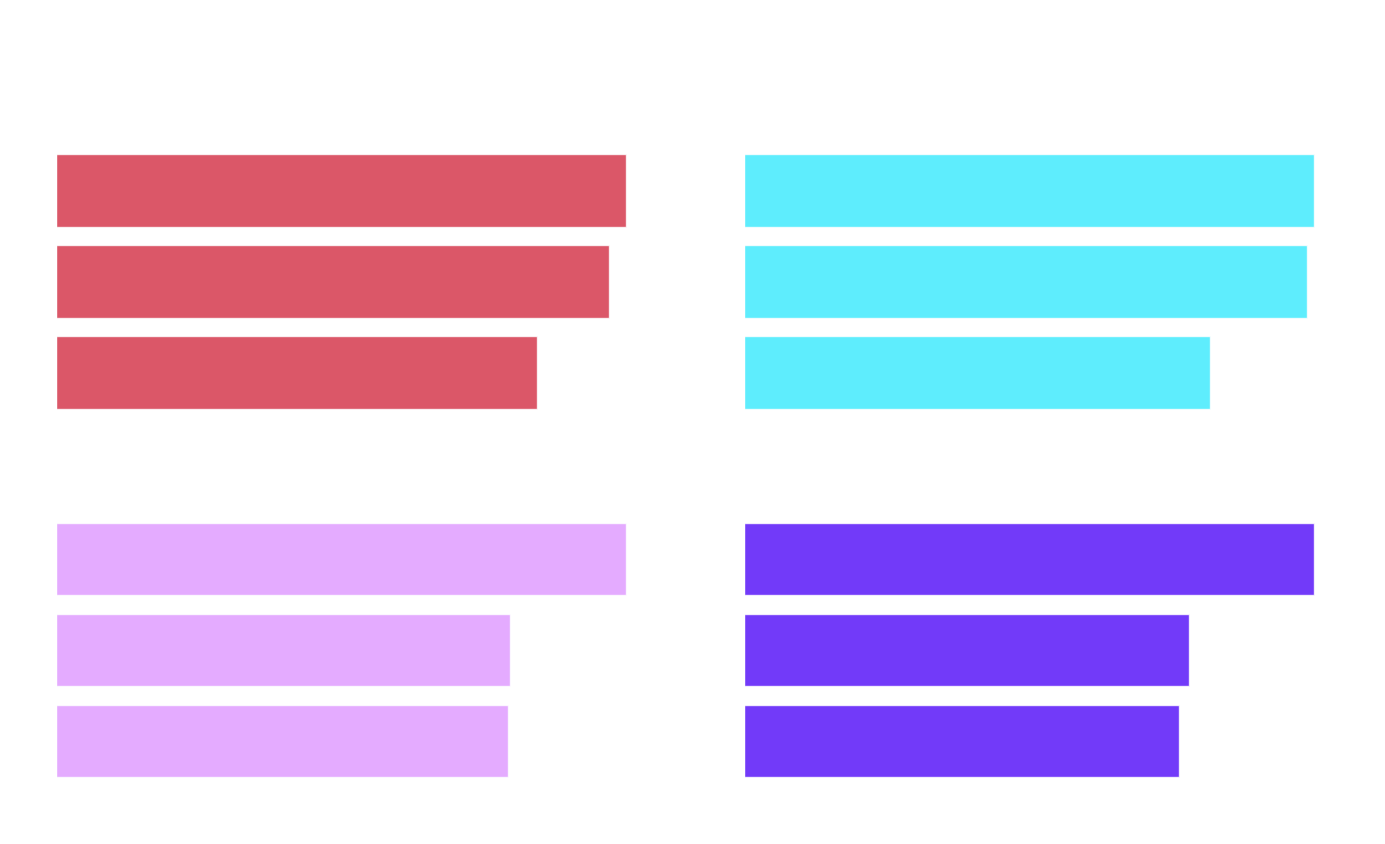

In [ ]:
# Tạo figure với nền trong suốt
plt.figure(figsize=(14, 8), facecolor='none')
plt.suptitle('TOP 3 CONSOLE PHỔ BIẾN NHẤT THEO KHU VỰC',
             fontsize=18, color='white', y=1.05)

# Màu sắc cho từng khu vực
colors = ['#d22d43', '#36e9fd', '#de97ff', '#4f09f8']

# Các khu vực cần phân tích
regions = {
    'Bắc Mỹ': 'NA_Sales',
    'Châu Âu': 'EU_Sales',
    'Nhật Bản': 'JP_Sales',
    'Toàn cầu': 'Global_Sales'
}

# Tạo subplot cho từng khu vực
for i, (region_name, region_col) in enumerate(regions.items(), 1):
    ax = plt.subplot(2, 2, i, facecolor='none')  # Nền trong suốt

    # Lấy top 3 console theo khu vực
    top_consoles = df.groupby('Platform')[region_col].sum().nlargest(3).sort_values()

    # Vẽ biểu đồ cột ngang
    bars = ax.barh(top_consoles.index, top_consoles.values,
                   color=colors[i-1], edgecolor='white', alpha=0.8)

    # Thiết lập chữ trắng
    ax.set_title(region_name, fontsize=14, color='white', pad=10)
    ax.set_xlabel('Doanh số (triệu bản)', fontsize=10, color='white')
    ax.tick_params(axis='both', colors='white')

    # Thêm giá trị trên mỗi cột
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}M',
                ha='left', va='center',
                color='white', fontsize=10)

    # Tùy chỉnh viền
    for spine in ax.spines.values():
        spine.set_color('white')

plt.tight_layout()

# Lưu file với nền trong suốt
plt.savefig('top_consoles_by_region.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight')

plt.show()

In [ ]:
nintendo_df = df[df['Publisher'].str.contains('Nintendo', na=False)]

In [ ]:
top_nintendo = nintendo_df.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_nintendo[['Name', 'Global_Sales']])

                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


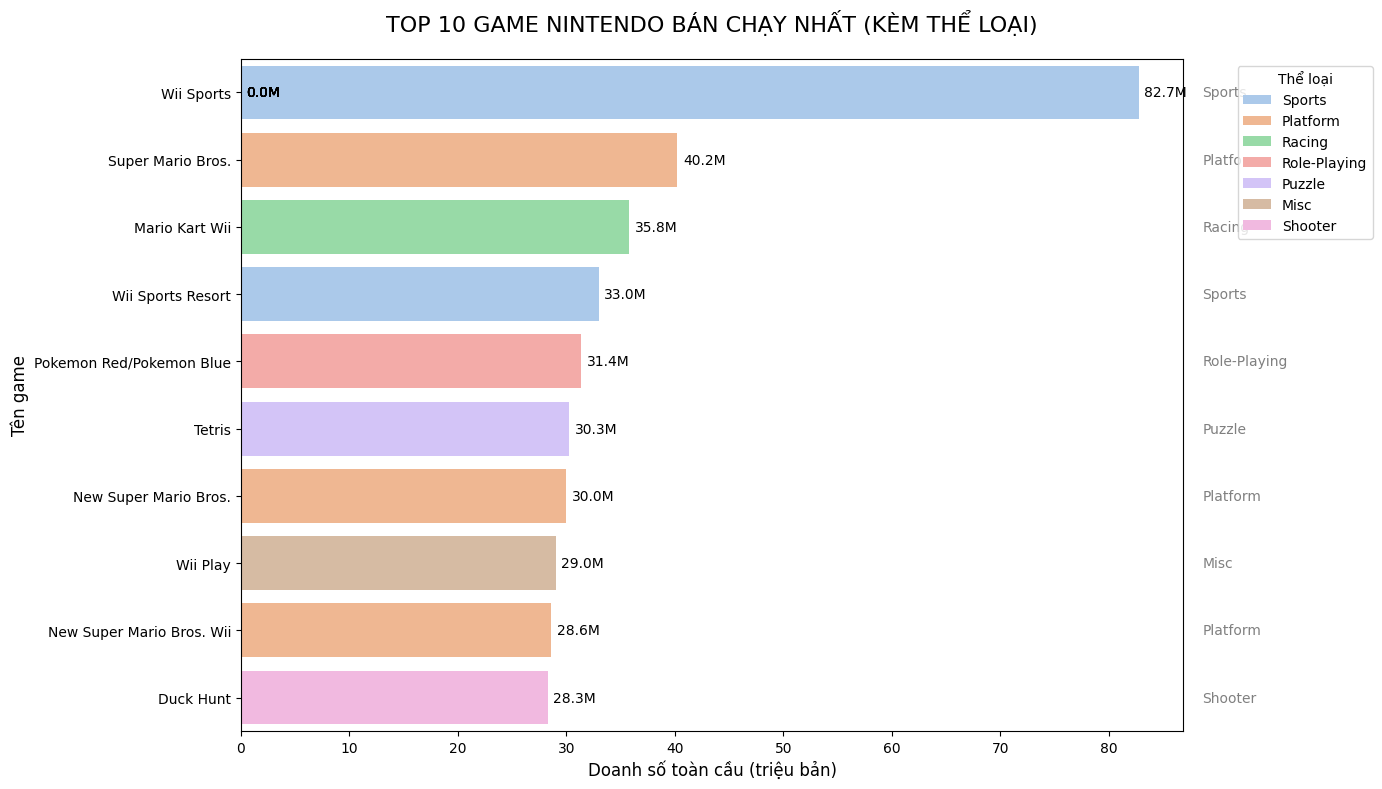

In [ ]:
# Lấy top 10 game bán chạy nhất
top_nintendo = nintendo_df.sort_values(by='Global_Sales', ascending=False).head(10)

# Tạo figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Global_Sales', y='Name',
                 data=top_nintendo,
                 hue='Genre',  # Phân màu theo thể loại
                 dodge=False,
                 palette='pastel')

# Thêm các thông tin chi tiết
plt.title('TOP 10 GAME NINTENDO BÁN CHẠY NHẤT (KÈM THỂ LOẠI)', fontsize=16, pad=20)
plt.xlabel('Doanh số toàn cầu (triệu bản)', fontsize=12)
plt.ylabel('Tên game', fontsize=12)

# Hiển thị giá trị doanh số trên mỗi cột
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5,
             p.get_y() + p.get_height()/2,
             f'{width:.1f}M',
             ha='left',
             va='center',
             fontsize=10)

# Hiển thị thể loại bên phải
for i, (name, genre) in enumerate(zip(top_nintendo['Name'], top_nintendo['Genre'])):
    plt.text(1.02, i, genre,
             ha='left',
             va='center',
             transform=ax.get_yaxis_transform(),
             fontsize=10,
             color='gray')

# Tùy chỉnh legend
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

(np.float64(-1.1520239710570779),
 np.float64(1.1024773242047563),
 np.float64(-1.1003180095793061),
 np.float64(1.1070237475931188))

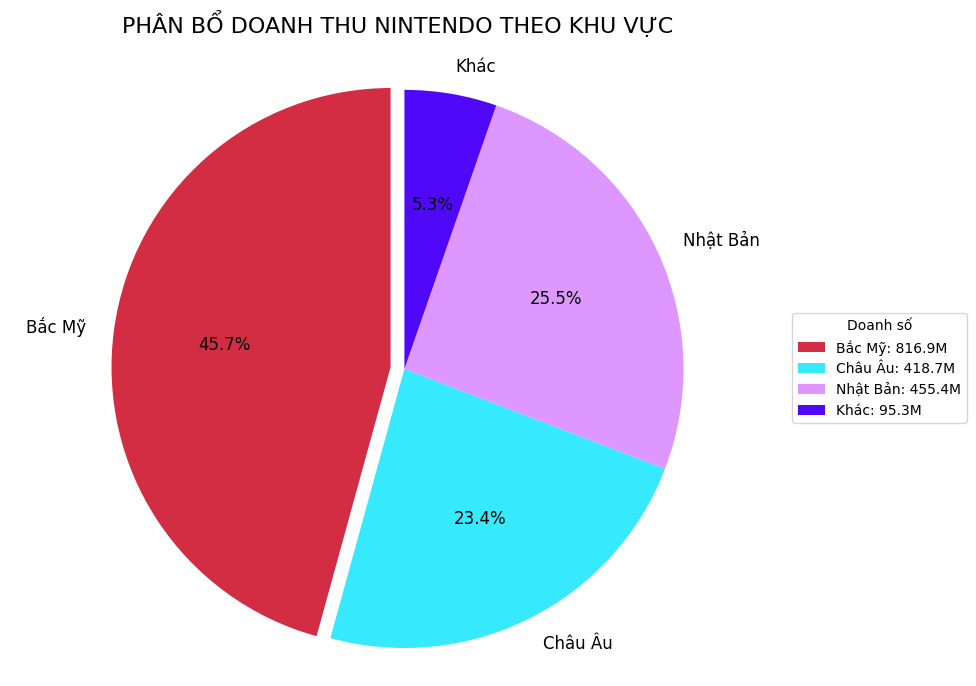

In [ ]:
#doanh thu nintendo khu vực
plt.figure(figsize=(10, 8))

# Tính tổng doanh số từng khu vực
region_sales = {
    'Bắc Mỹ': nintendo_df['NA_Sales'].sum(),
    'Châu Âu': nintendo_df['EU_Sales'].sum(),
    'Nhật Bản': nintendo_df['JP_Sales'].sum(),
    'Khác': nintendo_df['Other_Sales'].sum()
}

# Vẽ pie chart
wedges, texts, autotexts = plt.pie(
    region_sales.values(),
    labels=region_sales.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d22d43', '#36e9fd', '#de97ff', '#4f09f8'],
    explode=(0.05, 0, 0, 0),  # Nhấn mạnh phần Bắc Mỹ
    shadow=False,
    textprops={'fontsize': 12}
)

# Thêm số liệu tuyệt đối
plt.legend(
    [f"{k}: {v:.1f}M" for k, v in region_sales.items()],
    title="Doanh số",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('PHÂN BỔ DOANH THU NINTENDO THEO KHU VỰC', pad=20, fontsize=16)
plt.axis('equal')  # Đảm bảo hình tròn

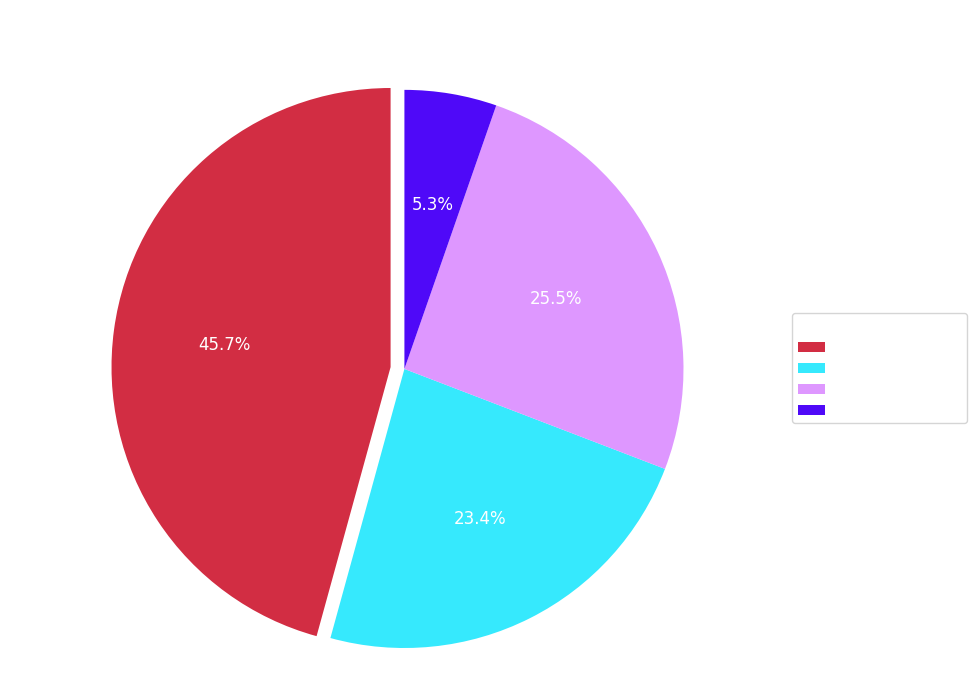

In [ ]:
# Doanh thu Nintendo khu vực
plt.figure(figsize=(10, 8), facecolor='none')  # Nền trong suốt

# Tính tổng doanh số từng khu vực
region_sales = {
    'Bắc Mỹ': nintendo_df['NA_Sales'].sum(),
    'Châu Âu': nintendo_df['EU_Sales'].sum(),
    'Nhật Bản': nintendo_df['JP_Sales'].sum(),
    'Khác': nintendo_df['Other_Sales'].sum()
}

# Vẽ pie chart
wedges, texts, autotexts = plt.pie(
    region_sales.values(),
    labels=region_sales.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d22d43', '#36e9fd', '#de97ff', '#4f09f8'],
    explode=(0.05, 0, 0, 0),  # Nhấn mạnh phần Bắc Mỹ
    shadow=False,
    textprops={'color': 'white', 'fontsize': 12}  # Chữ màu trắng
)

# Thêm số liệu tuyệt đối (chú thích màu trắng)
legend = plt.legend(
    [f"{k}: {v:.1f}M" for k, v in region_sales.items()],
    title="Doanh số",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    labelcolor='white'  # Màu chữ trắng cho chú thích
)
plt.setp(legend.get_title(), color='white')  # Màu trắng cho tiêu đề chú thích

plt.title('PHÂN BỔ DOANH THU NINTENDO THEO KHU VỰC', pad=20, fontsize=16, color='white')  # Tiêu đề màu trắng
plt.axis('equal')  # Đảm bảo hình tròn

# Đặt nền trong suốt cho toàn bộ figure
plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')

# Lưu hình ảnh với nền trong suốt (nếu cần)
plt.savefig('nintendo_revenue.png', transparent=True, bbox_inches='tight', dpi=300)

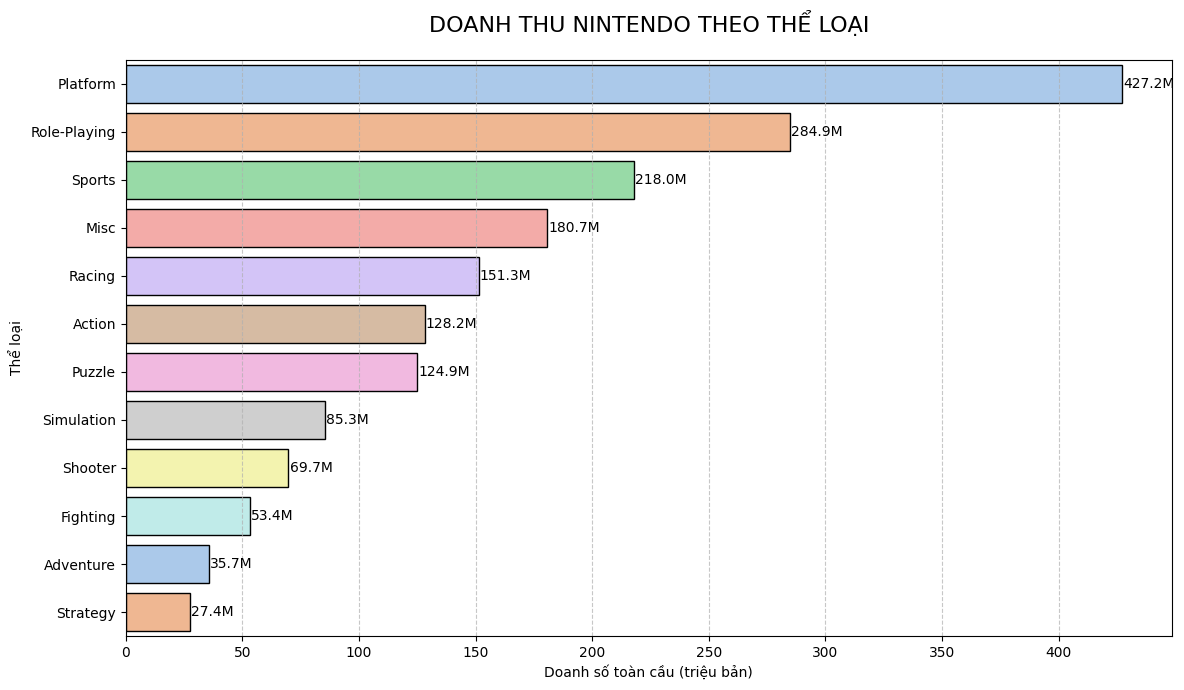

In [ ]:
plt.figure(figsize=(12, 7))

# Tính tổng doanh số theo thể loại
genre_sales = nintendo_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Vẽ bar plot
ax = sns.barplot(
    x=genre_sales.values,
    y=genre_sales.index,
    palette="pastel",
    edgecolor='black'
)

# Thêm giá trị trên mỗi cột
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height()/2,
        f'{width:.1f}M',
        ha='left',
        va='center',
        fontsize=10
    )

plt.title('DOANH THU NINTENDO THEO THỂ LOẠI', pad=20, fontsize=16)
plt.xlabel('Doanh số toàn cầu (triệu bản)')
plt.ylabel('Thể loại')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

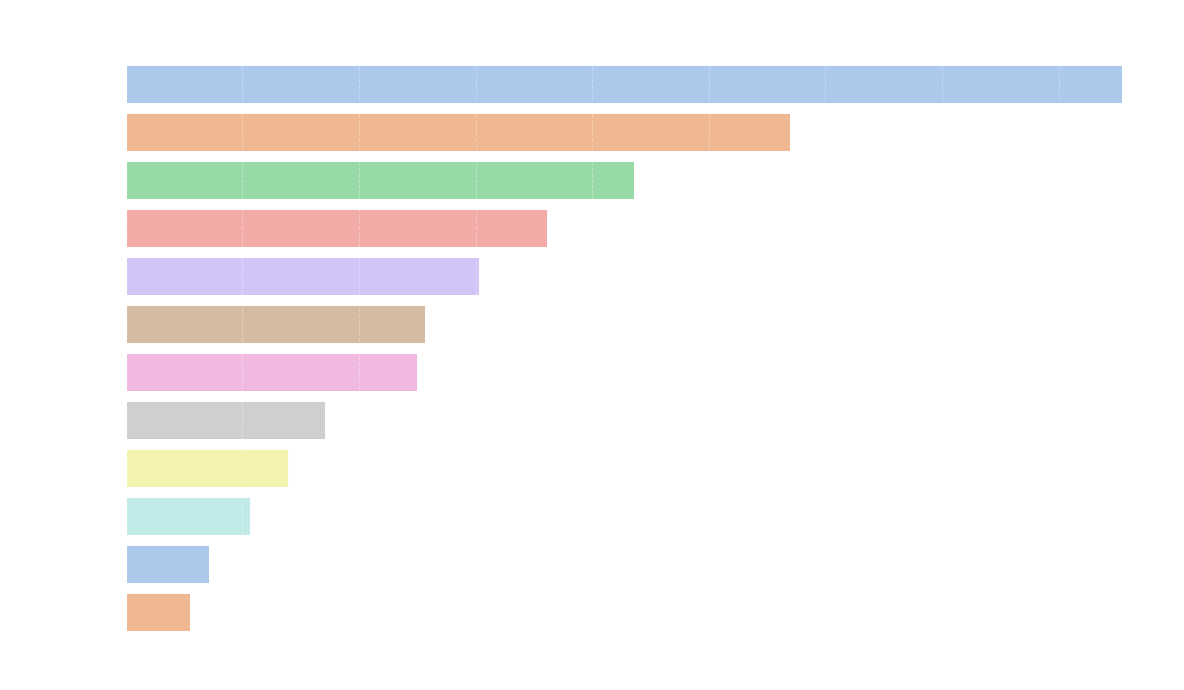

In [ ]:
plt.figure(figsize=(12, 7), facecolor='none')  # Nền trong suốt

# Tính tổng doanh số theo thể loại
genre_sales = nintendo_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Vẽ bar plot
ax = sns.barplot(
    x=genre_sales.values,
    y=genre_sales.index,
    palette="pastel",
    edgecolor='white',  # Viền màu trắng
    linewidth=0.7
)

# Đặt màu trắng cho chữ và đường kẻ
plt.title('DOANH THU NINTENDO THEO THỂ LOẠI', pad=20, fontsize=16, color='white')
plt.xlabel('Doanh số toàn cầu (triệu bản)', color='white')
plt.ylabel('Thể loại', color='white')

# Thêm giá trị trên mỗi cột (màu trắng)
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height()/2,
        f'{width:.1f}M',
        ha='left',
        va='center',
        fontsize=10,
        color='white'
    )

# Tùy chỉnh grid và ticks
ax.grid(axis='x', linestyle='--', alpha=0.3, color='white')  # Grid màu trắng nhạt
ax.tick_params(axis='both', colors='white')  # Tick màu trắng

# Đặt nền trong suốt cho axes và figure
ax.set_facecolor('none')
plt.gcf().set_facecolor('none')

# Chỉnh màu viền (spines) thành trắng
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
plt.show()

In [ ]:
shooter_df = df[df['Genre'] == 'Shooter']

In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Làm sạch và chuẩn hóa tên
def clean_title(title):
    title = title.lower()
    title = re.sub(r'[^a-zA-Z0-9 ]', '', title)
    return title

shooter_df['Clean_Title'] = shooter_df['Name'].apply(clean_title)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(shooter_df['Clean_Title'])

word_freq = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': words, 'freq': word_freq.tolist()[0]})
freq_df = freq_df.sort_values(by='freq', ascending=False)

print(freq_df.head(20))

            word  freq
297         duty    61
477           ii    48
915          tom    47
178      clancys    47
860         star    40
991         wars    39
243         dead    37
982          war    32
984      warfare    29
402        ghost    28
96   battlefield    27
367        force    25
113        black    25
589        medal    25
463        honor    25
659          ops    24
740          red    24
0            007    22
73          army    21
726      rainbow    21


In [ ]:
word_sales = {}

for index, row in shooter_df.iterrows():
    words = clean_title(row['Name']).split()
    for word in words:
        if word not in word_sales:
            word_sales[word] = 0
        word_sales[word] += row['Global_Sales']

# Chuyển thành DataFrame
word_sales_df = pd.DataFrame.from_dict(word_sales, orient='index', columns=['Global_Sales'])
word_sales_df = word_sales_df.sort_values(by='Global_Sales', ascending=False)
print(word_sales_df.head(20))

             Global_Sales
of                 341.97
call               252.34
duty               249.87
3                  141.55
2                  123.28
warfare            102.54
ops                 91.21
black               90.31
modern              77.93
4                   65.58
halo                63.90
the                 58.82
ii                  53.11
battlefield         47.25
war                 46.35
star                46.14
clancys             40.88
tom                 40.88
wars                37.20
honor               34.89


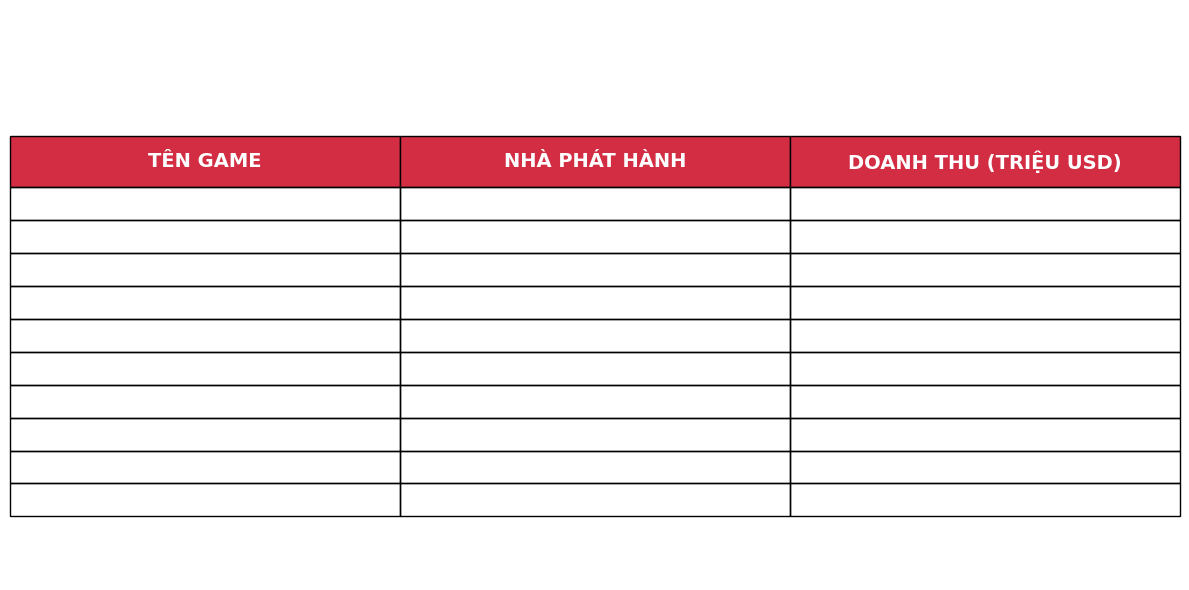

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lọc và sắp xếp dữ liệu
top_shooter = (
    df[df['Genre'] == 'Shooter'] # Filter the original df
    .sort_values('Global_Sales', ascending=False)
    .head(10)
    [['Name', 'Publisher', 'Global_Sales']]
)

# Tạo figure với nền trong suốt
plt.figure(figsize=(12, 6), facecolor='none', dpi=100)
ax = plt.gca()
ax.set_facecolor('none')

# Ẩn trục đồ thị
ax.axis('off')

# Tạo bảng với màu chữ trắng
table = plt.table(
    cellText=top_shooter.values,
    colLabels=['TÊN GAME', 'NHÀ PHÁT HÀNH', 'DOANH THU (TRIỆU USD)'],
    loc='center',
    cellLoc='left',
    colColours=['#d22d43'] * 3,  # Màu header
    cellColours=[['none']*3] * len(top_shooter)  # Nền trong suốt cho dữ liệu
)

# Định dạng bảng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.8)  # Giãn dòng

# Thiết lập màu chữ trắng
for (row, col), cell in table.get_celld().items():
    cell.set_text_props(color='white', fontfamily='sans-serif')
    if row == 0:  # Header
        cell.set_height(0.1)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')

# Thêm tiêu đề
plt.title('TOP 10 GAME SHOOTER DOANH THU CAO NHẤT',
          color='white',
          fontsize=18,
          pad=30,
          weight='bold')

# Lưu ảnh (tuỳ chọn)
plt.savefig('top_shooter_games.png',
            transparent=True,
            bbox_inches='tight',
            dpi=120)

plt.tight_layout()
plt.show()

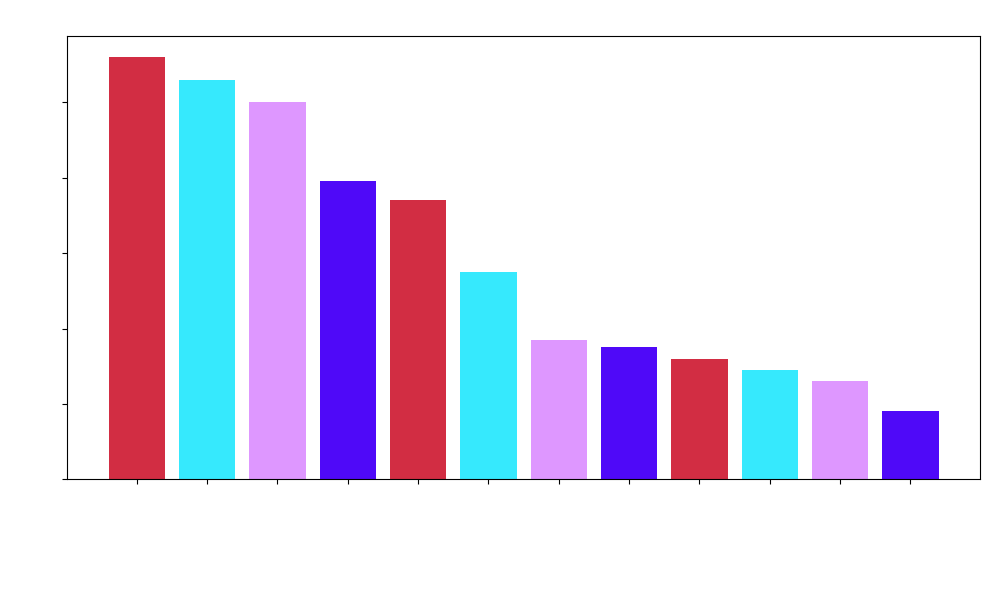

In [ ]:
# Lọc các game do Nintendo phát hành
nintendo_games = df[df['Publisher'] == 'Nintendo']

# Đếm số lượng game theo thể loại
genre_counts = nintendo_games['Genre'].value_counts()

# Màu chỉ định (sẽ lặp lại nếu thể loại > số màu)
colors = ['#d22d43', '#36e9fd', '#de97ff', '#4f09f8']
bar_colors = [colors[i % len(colors)] for i in range(len(genre_counts))]

# Tạo biểu đồ
plt.figure(figsize=(10, 6), facecolor='none')
bars = plt.bar(genre_counts.index, genre_counts.values, color=bar_colors)

# Thêm số lên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', color='white', fontsize=10)

# Tùy chỉnh đồ họa
plt.title('Số lượng game của Nintendo theo thể loại', color='white', fontsize=14)
plt.xlabel('Thể loại', color='white')
plt.ylabel('Số lượng game', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(False)
plt.tight_layout()

# Nền trong suốt
plt.gca().set_facecolor('none')
plt.savefig('nintendo_genre_count.png', dpi=300, transparent=True)
plt.show()